In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns

In [2]:
#acc = gpd.read_file('https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.geojson')

In [3]:
acc = gpd.read_file('data/Collisions.geojson')

In [4]:
timeline=acc['INCDATE']

In [5]:
inc_datetimes=acc['INCDTTM']
inc_datetimes[0]

'8/15/2018 8:00:00 PM'

In [6]:
type(inc_datetimes)

pandas.core.series.Series

In [7]:
from dateutil import parser
dt = parser.parse(inc_datetimes[0])
print(dt)

2018-08-15 20:00:00


In [8]:
dts = pd.Series([parser.parse(d) for d in inc_datetimes])

In [9]:
type(dts)

pandas.core.series.Series

In [10]:
acc['inc_datetime'] = dts

In [11]:
years = pd.DataFrame([d.year for d in dts], columns=['year'])

In [12]:
years.count()

year    209386
dtype: int64

In [13]:
years.head(1)

,year
0,2018


In [14]:
years_cleaned = years[(years['year']>2003) & (years['year']<2019)]

In [15]:
years_count=years_cleaned.groupby('year').size()
years_count

year
2004    15457
2005    16016
2006    15794
2007    15082
2008    14139
2009    13275
2010    11958
2011    12416
2012    12732
2013    12757
2014    13212
2015    14260
2016    13905
2017    12475
2018    12192
dtype: int64

In [25]:
years_count.index

Int64Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018],
           dtype='int64', name='year')

In [32]:
def history_plt_04to18(disp_values, label):
    '''
    plots values form statistics for the years 2004 to 2008.
    Input: list of 14 values
    output: plot
    '''
    x = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018]
    y = disp_values #years_count.values

    plt.figure(figsize=(10,6)) 
    plt.bar(x, y, color = 'b')
    plt.title('{} per year'.format(label))
    plt.xlabel('Years')
    plt.ylabel(label)

    plt.savefig('{}_by_year.png'.format(label))

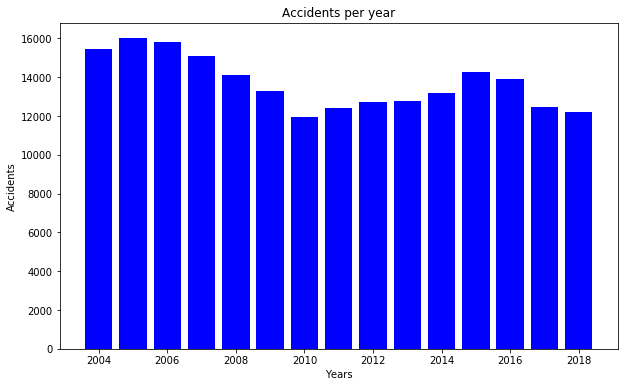

In [33]:
history_plt_04to18(years_count.values, 'Accidents')

In [57]:
popl_gr = pd.read_csv('data/seattle_ppl.csv', ' ')

In [58]:
type(popl_gr['Population'][0])


numpy.int64

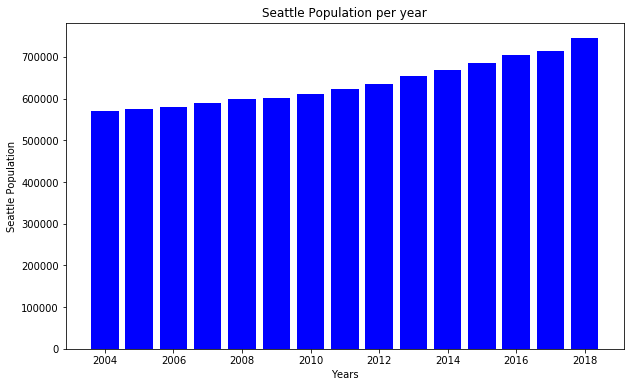

In [59]:
history_plt_04to18(popl_gr['Population'], 'Seattle Population')

In [53]:
gdp = pd.read_csv('data/gdp_by_year.csv', '\t')

In [38]:
gdp

,Year,Nominal GDP (trillions),Real GDP (trillions),GDP Growth Rate,Events Affecting GDP
0,2004,12.214,14.406,3.8,
1,2005,13.037,14.913,3.5,Katrina. Bankruptcy Act.
2,2006,13.815,15.338,2.9,Fed raised rates.
3,2007,14.452,15.626,1.9,Bank crisis.
4,2008,14.713,15.605,-0.1,Financial crisis.
5,2009,14.449,15.209,-2.5,Stimulus Act.
6,2010,14.992,15.599,2.6,ACA. Dodd-Frank.
7,2011,15.543,15.841,1.6,Japan earthquake.
8,2012,16.197,16.197,2.2,Fiscal cliff.
9,2013,16.785,16.495,1.8,Sequestration.


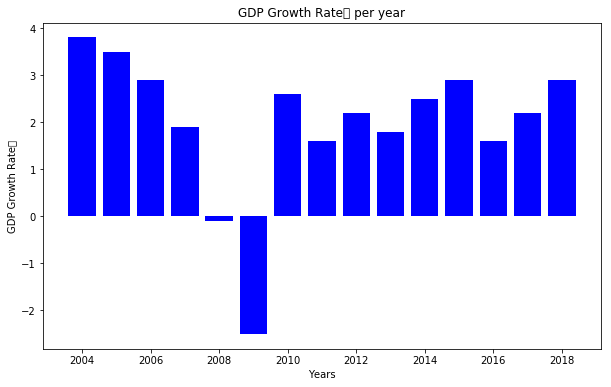

In [39]:
history_plt_04to18(gdp['GDP Growth Rate'], 'GDP Growth Rate	')